In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
df = pd.read_csv('Dataset/Sleep_health_and_lifestyle_dataset.csv')  # adjust the filename


In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.shape

(374, 13)

In [11]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [13]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [17]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [29]:
df['Occupation'].unique()


array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [31]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

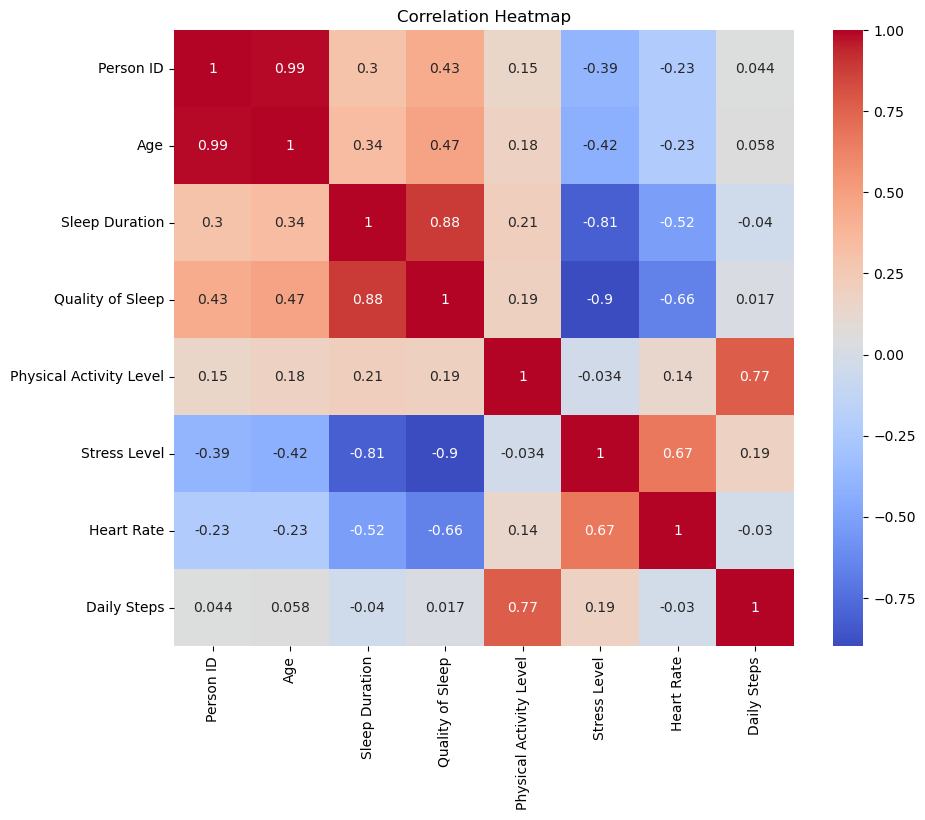

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns 

num_d=df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(num_d.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

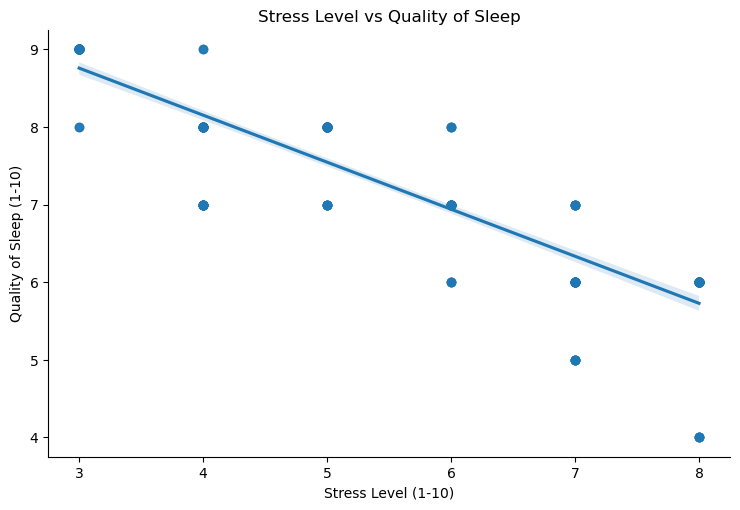

In [37]:
sns.lmplot(data=df, x='Stress Level', y='Quality of Sleep', aspect=1.5)
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Quality of Sleep (1-10)')
plt.show()

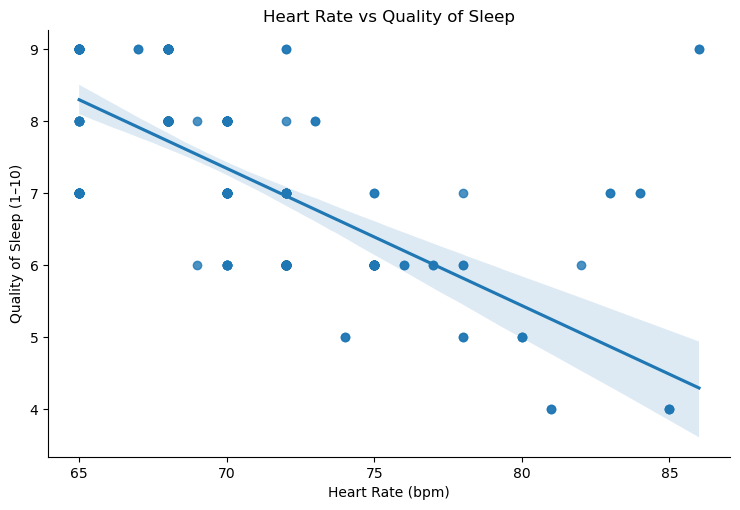

In [39]:
sns.lmplot(data=df, x='Heart Rate', y='Quality of Sleep', aspect=1.5)
plt.title('Heart Rate vs Quality of Sleep')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Quality of Sleep (1–10)')
plt.show()

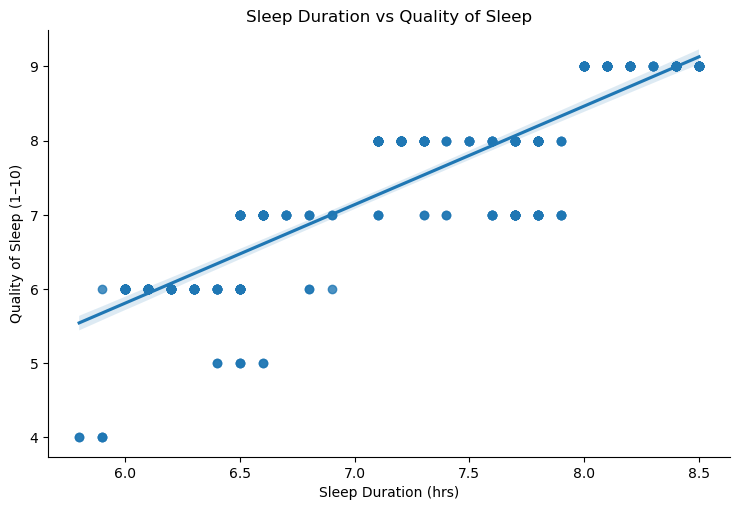

In [102]:
sns.lmplot(data=df, x='Sleep Duration', y='Quality of Sleep', aspect=1.5)
plt.title('Sleep Duration vs Quality of Sleep')
plt.xlabel('Sleep Duration (hrs)')
plt.ylabel('Quality of Sleep (1–10)')
plt.show()

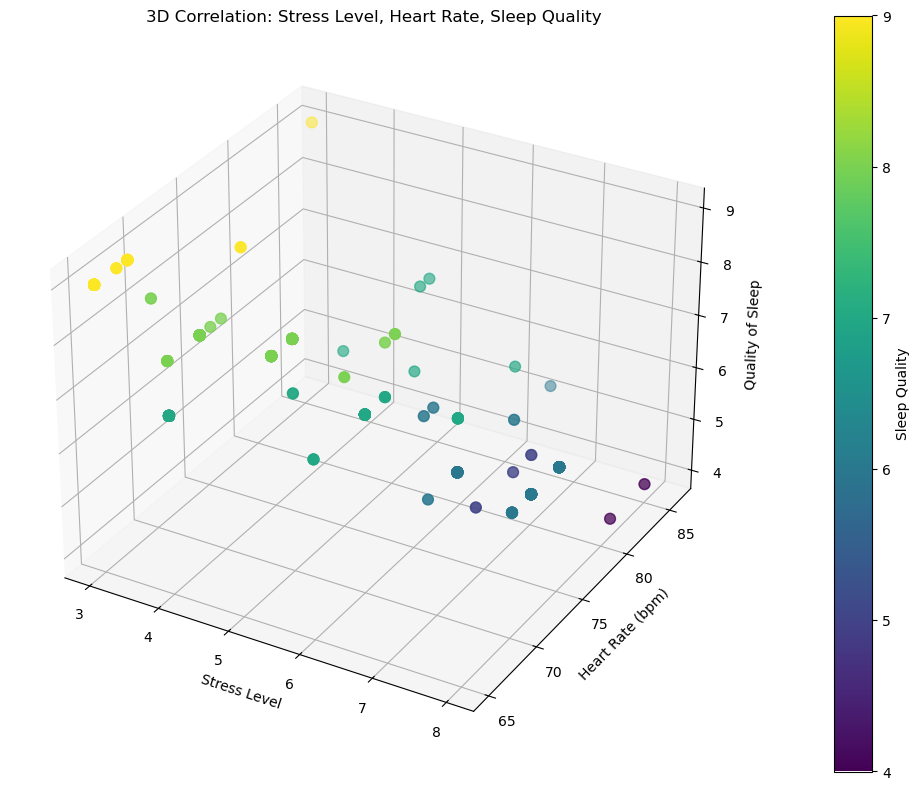

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign axes
x = df['Stress Level']
y = df['Heart Rate']
z = df['Quality of Sleep']

# Plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=60)

# Axis labels
ax.set_xlabel('Stress Level')
ax.set_ylabel('Heart Rate (bpm)')
ax.set_zlabel('Quality of Sleep')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Sleep Quality')

# Title
ax.set_title('3D Correlation: Stress Level, Heart Rate, Sleep Quality')

plt.tight_layout()
plt.show()


In [43]:
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])
data['Occupation']=encoder.fit_transform(data['Occupation'])
data['BMI Category']=encoder.fit_transform(data['BMI Category'])
data['Sleep Disorder']=encoder.fit_transform(data['Sleep Disorder'])

NameError: name 'LabelEncoder' is not defined

In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['BMI Category'] = encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = encoder.fit_transform(df['Sleep Disorder'])


In [49]:
# Split the blood pressure column into two numerical columns
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(bp_split[0])
df['Diastolic BP'] = pd.to_numeric(bp_split[1])

# Drop the original Blood Pressure column
df.drop(columns=['Blood Pressure'], inplace=True)

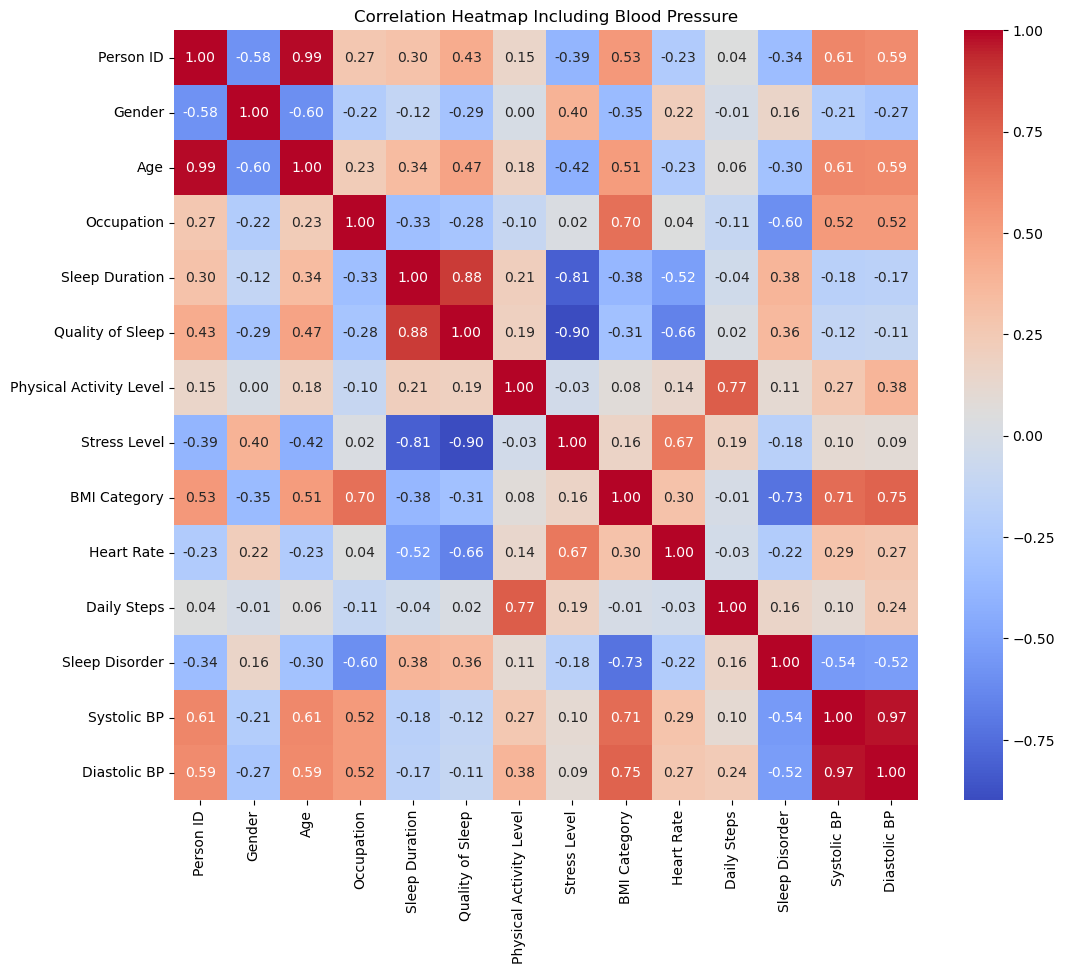

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns again (now includes Systolic and Diastolic)
num_d = df.select_dtypes(include=[np.number])

# Create heatmap
plt.figure(figsize=(12,10))
sns.heatmap(num_d.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including Blood Pressure')
plt.show()

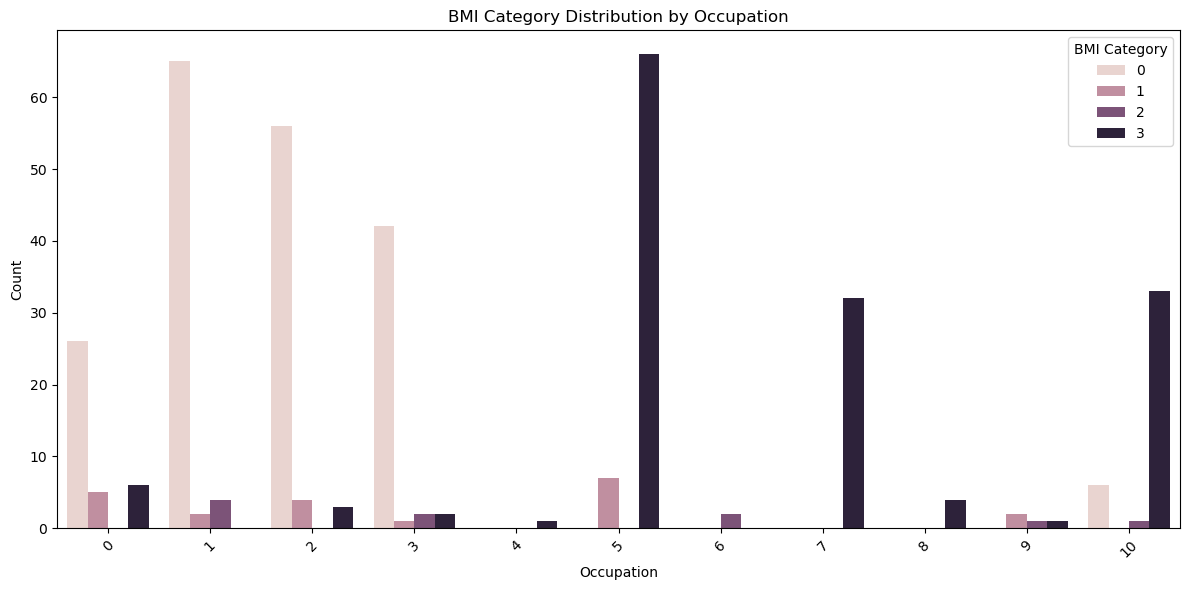

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Occupation', hue='BMI Category')
plt.xticks(rotation=45)
plt.title('BMI Category Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()

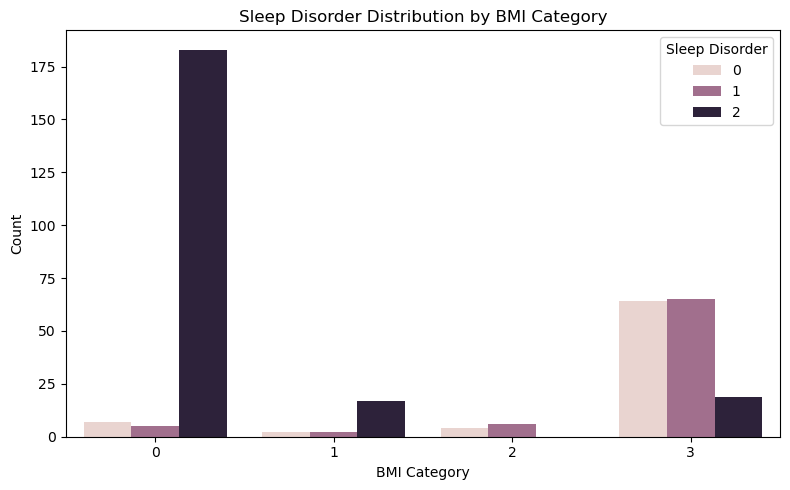

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder')
plt.title('Sleep Disorder Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

In [61]:
for i, label in enumerate(encoder.classes_):
    print(f"{i}: {label}")

0: Insomnia
1: Sleep Apnea
2: nan


In [63]:
df.drop('Person ID',axis=1,inplace=True)

In [65]:
df['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 32.3 KB


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Target: Sleep quality score (1–10 scale)
target = 'Quality of Sleep'

# Drop the target column to create feature set
X = df.drop(columns=[target])
y = df[target]

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store fold metrics
accuracies = []
precisions = []
recalls = []
y = df['Quality of Sleep']
y = y - y.min()
# Loop through folds
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initialize model
    model = XGBClassifier(
        eval_metric='mlogloss',
        random_state=42
    )

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_val)

    # Evaluate
    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted', zero_division=0))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))

# Report mean scores
print(f'Average Accuracy: {np.mean(accuracies):.3f}')
print(f'Average Precision: {np.mean(precisions):.3f}')
print(f'Average Recall: {np.mean(recalls):.3f}')


Average Accuracy: 0.979
Average Precision: 0.981
Average Recall: 0.979


In [81]:
import pandas as pd

# Save to CSV
df.to_csv('cleaned_sleep_data.csv', index=False)

# Optionally save to a pickle (preserves dtypes)
df.to_pickle('cleaned_sleep_data.pkl')


In [85]:
import joblib


joblib.dump(model, 'xgboost_sleep_model.pkl')


['xgboost_sleep_model.pkl']

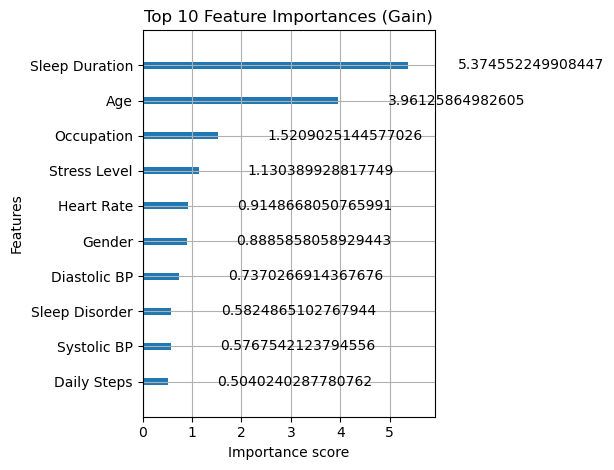

In [87]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (Gain)")
plt.tight_layout()
plt.show()

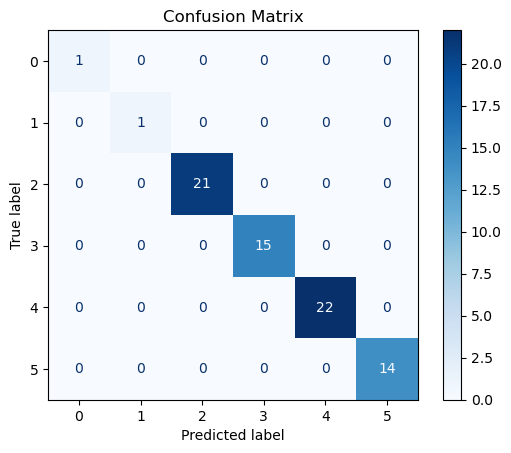

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Assuming y_val and y_pred from a single fold are still in memory
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [96]:
!pip install shap


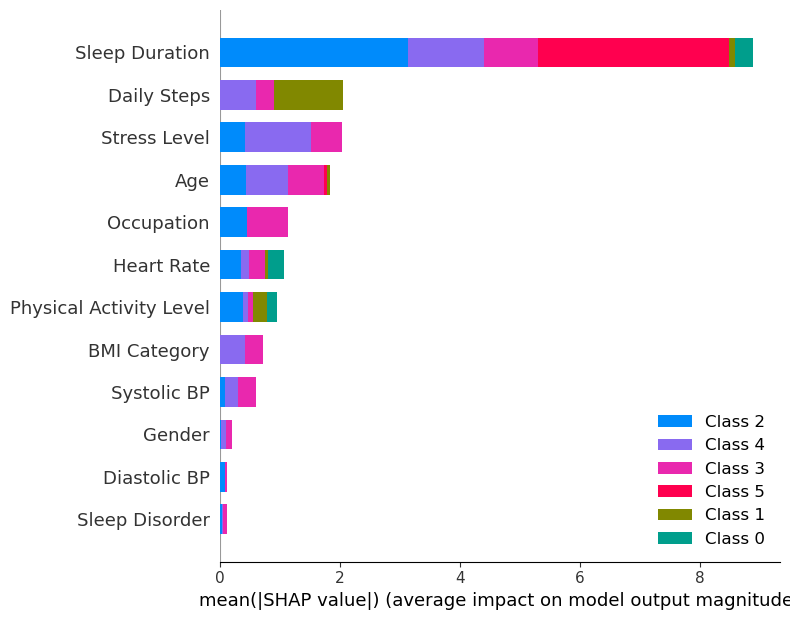

In [98]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X)